## 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from micromlgen import port
from time import gmtime, strftime
import os

## 2. Data Preparation

In [2]:
# Load Dataset dan Label
data_gerakan_benar_1 = pd.read_csv('Dataset/Dataset Benar/Fase Relaks_Benar.csv')
data_gerakan_benar_1["kelas"] = "BENAR"
data_gerakan_benar_2 = pd.read_csv('Dataset/Dataset Benar/Fase Kontraksi_Benar.csv')
data_gerakan_benar_2["kelas"] = "BENAR"
data_gerakan_salah_1 = pd.read_csv('Dataset/Dataset Salah/Fase Relaks_Salah.csv')
data_gerakan_salah_1["kelas"] = "SALAH"
data_gerakan_salah_2 = pd.read_csv('Dataset/Dataset Salah/Fase Kontraksi_Salah.csv')
data_gerakan_salah_2["kelas"] = "SALAH"

In [3]:
# Gabungkan semua dataset menjadi satu
data = pd.concat([
    data_gerakan_benar_1,
    data_gerakan_benar_2,
    data_gerakan_salah_1,
    data_gerakan_salah_2,
    ], ignore_index=True)
# Tampilkan beberapa baris pertama data
data.head()

,ax1,ay1,az1,gx1,gy1,gz1,ax2,ay2,az2,gx2,gy2,gz2,ax3,ay3,az3,gx3,gy3,gz3,kelas
0,6.81,-7.63,-1.48,-0.05,-0.03,-0.00,-1.04,9.42,1.60,0.08,-0.04,-0.02,-0.14,9.52,1.32,-0.00,0.01,-0.01,BENAR
1,6.42,-8.00,-1.74,-0.05,-0.02,0.01,-0.68,9.48,1.59,0.07,-0.01,-0.04,0.24,9.34,1.51,0.02,-0.04,-0.02,BENAR
2,6.90,-7.61,-1.86,-0.02,-0.06,-0.00,-1.43,9.31,1.63,0.05,0.03,-0.02,-0.01,9.22,1.27,0.03,0.02,-0.00,BENAR
3,6.78,-7.78,-2.02,-0.05,0.01,-0.00,-1.63,9.41,1.17,0.08,-0.04,-0.03,-0.09,9.50,1.29,-0.01,-0.02,0.01,BENAR
4,7.18,-7.35,-0.83,-0.06,-0.01,0.00,-0.88,9.54,1.03,0.07,-0.04,-0.03,0.18,9.42,1.51,0.02,-0.00,0.00,BENAR


In [4]:
# Tampilkan jumlah baris dan kolom pada dataset
data.shape

(240, 19)

## 3. Preprocessing

In [5]:
# Pisahkan fitur (X) dan label (y) dari data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [7]:
# Menampilkan data latih
X_train

,ax1,ay1,az1,gx1,gy1,gz1,ax2,ay2,az2,gx2,gy2,gz2,ax3,ay3,az3,gx3,gy3,gz3
42,5.76,-8.44,-2.52,-0.05,-0.03,-0.01,1.27,9.50,1.69,0.08,-0.02,-0.02,1.11,9.56,0.06,0.01,0.02,0.00
120,6.07,-9.46,-6.59,-1.60,-0.33,-1.83,3.10,8.19,3.25,-1.16,-0.55,0.60,0.40,10.01,-0.64,0.05,-0.03,0.07
169,8.95,2.69,0.62,-0.05,-0.15,-0.58,2.67,9.46,0.71,-0.25,-0.33,0.09,1.25,9.75,-0.09,-0.04,0.02,0.02
208,3.65,8.69,-1.68,0.19,-0.36,0.54,9.94,2.48,-1.54,0.02,0.27,-0.13,-0.43,9.51,-2.12,0.01,-0.08,0.02
48,5.62,-8.54,-2.52,-0.05,-0.03,-0.00,1.25,9.61,1.14,0.08,-0.02,-0.03,1.11,9.62,0.14,-0.01,0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,4.53,2.71,-9.88,-0.05,-0.01,-0.01,8.26,-2.27,5.24,0.09,-0.05,-0.03,-0.25,9.52,-2.26,0.00,-0.00,0.00
103,4.62,0.37,-10.31,-0.05,0.01,0.01,5.48,0.82,8.11,0.09,-0.04,-0.05,1.10,9.54,1.09,0.01,-0.01,-0.01
67,4.44,2.05,-10.15,-0.10,-0.01,-0.01,4.50,0.31,7.90,0.06,-0.07,-0.02,-0.04,8.94,3.13,-0.01,-0.02,0.01
24,6.43,-7.86,-2.92,-0.05,-0.02,0.01,1.24,9.05,3.22,0.07,-0.02,-0.04,-0.53,9.52,-1.87,0.05,-0.01,-0.01


In [8]:
# Menampilkan label latih
y_train

42     BENAR
120    SALAH
169    SALAH
208    SALAH
48     BENAR
       ...  
87     BENAR
103    BENAR
67     BENAR
24     BENAR
8      BENAR
Name: kelas, Length: 192, dtype: object

## 4. Hyperparameter Tuning

In [9]:
# Tentukan grid parameter untuk Grid Search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}

In [10]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melakukan Grid Search dengan cross-validation untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100]})

In [11]:
# Mendapatkan model terbaik dari hasil Grid Search
best_rf_model = grid_search.best_estimator_
print("Best Parameters from Grid Search:", grid_search.best_params_)

Best Parameters from Grid Search: {'max_depth': None, 'n_estimators': 100}


## 5. Training Model

In [12]:
# Melatih model Random Forest dengan parameter terbaik yang ditemukan
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 6. Evaluation

In [13]:
# Prediksi data uji dengan model terbaik
y_pred = best_rf_model.predict(X_test)

In [14]:
# Tampilkan skor akurasi dan laporan klasifikasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model Terbaik: {accuracy:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi Model Terbaik: 0.96
Classification Report:
               precision    recall  f1-score   support

       BENAR       0.91      1.00      0.95        21
       SALAH       1.00      0.93      0.96        27

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



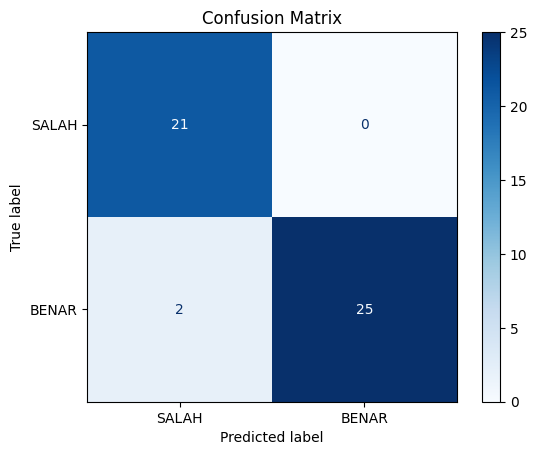

In [15]:
# Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SALAH', 'BENAR']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 7. Export

In [16]:
# Fungsi untuk mengekspor model sebagai file header C
def save_model(model):
    now = strftime("%Y%m%d%H%M%S", gmtime())
    path = f"output/{now}"
    os.makedirs(path, exist_ok=True)

    c_code = port(model, classmap={0: "BENAR", 1: "SALAH"})
    with open(f"{path}/model_RF.h", "w") as f:
        f.write(c_code)
    print(f"Model disimpan dengan ukuran: {os.path.getsize(f'{path}/model_RF.h')} bytes")

# Simpan model terbaik dalam format C header file
save_model(best_rf_model)

Model disimpan dengan ukuran: 204317 bytes
